### Trying to optimize

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' and "STATUS"
application_df=application_df.drop("EIN",1)
application_df=application_df.drop("NAME",1)
application_df=application_df.drop("STATUS",1)

application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(counts[counts<200].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classfication = application_df.CLASSIFICATION.value_counts()
classfication

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C4500        1
C1900        1
C3700        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

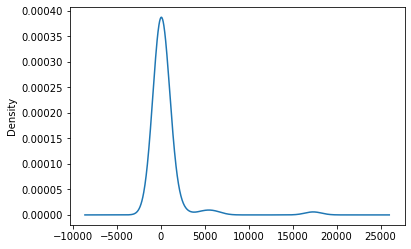

In [8]:
# Visualize the value counts of CLASSIFICATION
classfication.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classfication[classfication<1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [11]:
# Generate our categorical variable lists
application_cat=["APPLICATION_TYPE",
           "AFFILIATION",
           "CLASSIFICATION",
           "USE_CASE",
           "ORGANIZATION",
           "INCOME_AMT",
           "SPECIAL_CONSIDERATIONS"]

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
df=application_df.merge(encode_df, left_index=True, right_index=True)
df=df.drop(["APPLICATION_TYPE",
           "AFFILIATION",
           "CLASSIFICATION",
           "USE_CASE",
           "ORGANIZATION",
           "INCOME_AMT",
           "SPECIAL_CONSIDERATIONS"],1)
df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y=df["IS_SUCCESSFUL"].values
X=df.drop(["IS_SUCCESSFUL"],1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### MODEL AFTER REMOVING STATUS

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 42
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3440      
                                                                 
 dense_16 (Dense)            (None, 30)                2430      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5725 - accuracy: 0.7202
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7308
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7323
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5453 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7399
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7386
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7390
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7396
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7387
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7390
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7400
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7398
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7388
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5547 - accuracy: 0.7279 - 344ms/epoch - 1ms/step
Loss: 0.5546882748603821, Accuracy: 0.7279300093650818


In [35]:
### MODEL AFTER CHANTING ACTIVATION FUNCTION


In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 42
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 80)                3440      
                                                                 
 dense_22 (Dense)            (None, 30)                2430      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [40]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 1.9499 - accuracy: 0.6478
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 1.0167 - accuracy: 0.6773
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.7145 - accuracy: 0.6992
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6548 - accuracy: 0.7221
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6570 - accuracy: 0.7171
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6621 - accuracy: 0.7221
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6333 - accuracy: 0.7177
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6293 - accuracy: 0.7160
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.7194
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5926 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.7215
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7376
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5417 - accuracy: 0.7377
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7213
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5772 - accuracy: 0.7331
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5722 - accuracy: 0.7318
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5737 - accuracy: 0.7376
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5678 - accuracy: 0.7381
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5634 - accuracy: 0.7359
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5583 - accuracy: 0.7294 - 360ms/epoch - 1ms/step
Loss: 0.5583063364028931, Accuracy: 0.7294460535049438


In [42]:
### MODEL AFTER ADDING MORE NEURONS

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 42
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 120

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 120)               5160      
                                                                 
 dense_25 (Dense)            (None, 120)               14520     
                                                                 
 dense_26 (Dense)            (None, 1)                 121       
                                                                 
Total params: 19,801
Trainable params: 19,801
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [45]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5675 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7321: 0s - loss: 0.5467 - ac
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5496 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7331
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7341
Epoch 10/100
804/804 [==============================] - 1s 1ms/step

804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7404
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7405
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7398
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7403
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7397
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7398
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7401
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7408
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7402
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5689 - accuracy: 0.7275 - 361ms/epoch - 1ms/step
Loss: 0.5688917636871338, Accuracy: 0.7274635434150696


In [47]:
nn.save("AlphabetSoupCharity_Optimization.h5")